# 1 Demonstration of leaf RT model

Prof. P. Lewis

UCL and NERC NCEO

15 January 2016

These notes demonstrate how to use the python class Leaf to simulate leaf reflectance and transmittance spectra.

In [1]:
import leaf
import pylab as plt
import numpy as np

def plotty(l,r,t):
    plt.figure(figsize=(15,3))
    print('number of samples',len(l))
    plt.plot(l,r,'b--',label='reflectance')
    plt.plot(l,t,'r--',label='transmittance')
    plt.plot(l,(r+t),'g',label='single scattering albedo')
    plt.xlim(l[0],l[-1])
    plt.xlabel('wavelength / nm')
    plt.ylabel('reflectance')
    plt.legend(loc='best')

First, create an instance of the `Leaf` class:

keys available: dict_keys(['lambda', 'refractive', 'k_Cab', 'k_Car', 'k_Brown', 'k_Cw', 'k_Cm', 'Es', 'Ed', 'Rsoil1', 'Rsoil2'])
number of samples 2101


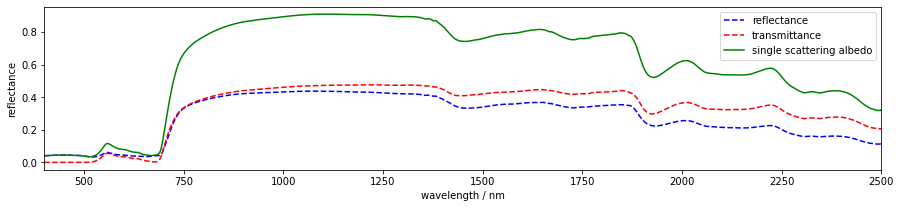

In [2]:
l = leaf.Leaf()
print ('keys available:',l.data.keys())

# set up parameters
conc = {'Cab':50, 'Car':50, 'N':1.5, 'Cw':0.001, 'Brown':1.0, 'Cm':0.01}
l.rt(conc)
plotty(l.data['lambda'],l.r,l.t)

e.g. looking at N impacts on $\omega$ and $\zeta$, where:

$$
\omega = \rho_l + \tau_l
$$

$$
\zeta = \frac{\tau_l}{\rho_l + \tau_l}
$$

both of which are bounded $[0,1]$.

keys available: dict_keys(['lambda', 'refractive', 'k_Cab', 'k_Car', 'k_Brown', 'k_Cw', 'k_Cm', 'Es', 'Ed', 'Rsoil1', 'Rsoil2'])


Text(0.5, 1.0, 'relative ${mean \\zeta}/\\zeta$')

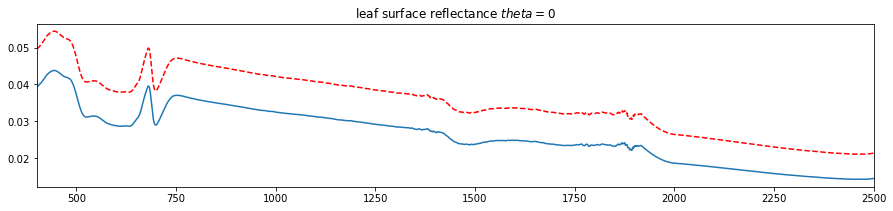

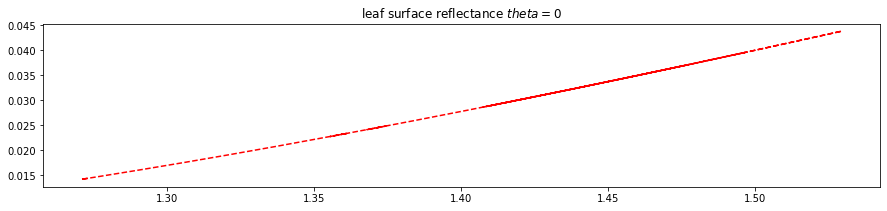

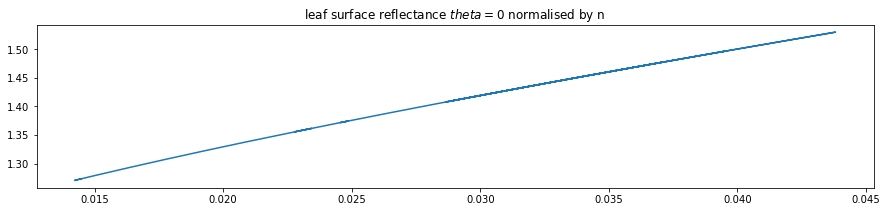

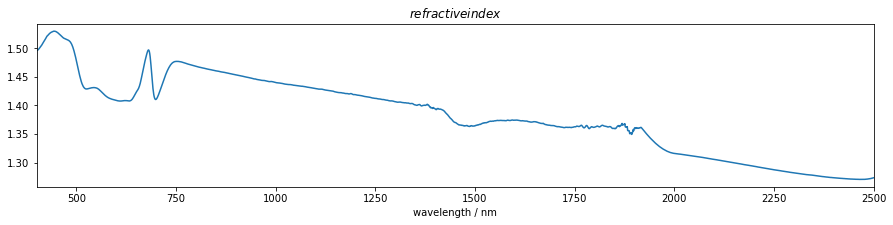

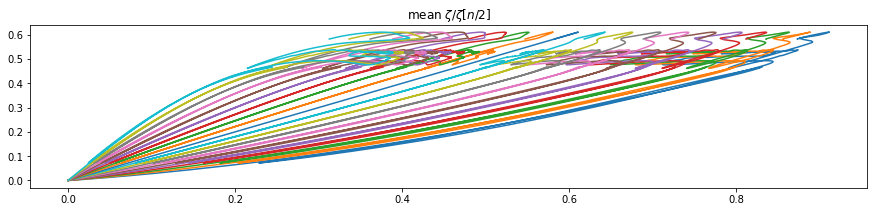

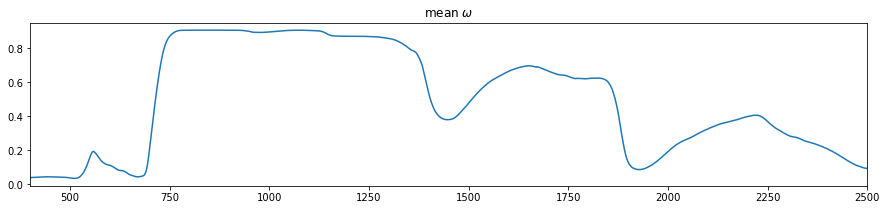

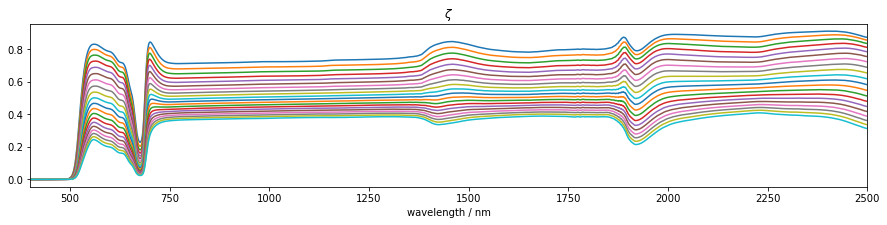

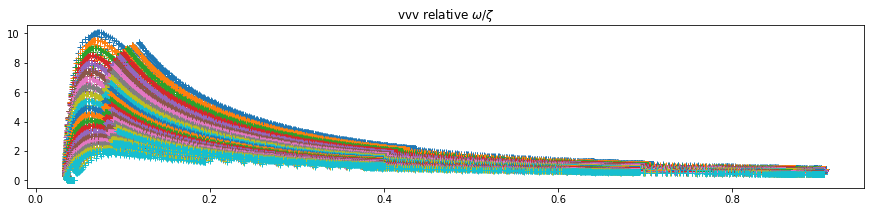

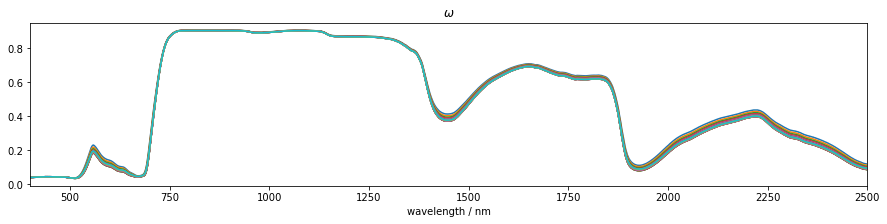

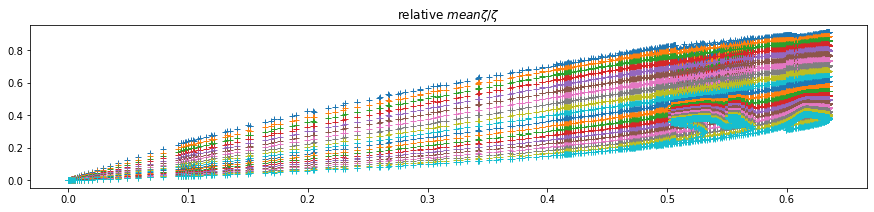

In [3]:
l = leaf.Leaf(store=True)
print ('keys available:',l.data.keys())

Nlim = [0.7,2.5]
nsamp = 20
dN = (Nlim[1]-Nlim[0])/float(nsamp-1)
omega = np.zeros((nsamp,l.nw[0]))
zeta = np.zeros_like(omega)
theta = 0.
#theta = 90.
l.theta=theta

# get the leaf surface reflectance
# to normalise omega if want
# or set to 0
conc = {'theta': theta, 'Cm':10000000.0, 'Cw':10000000.0, 'N':1.0}
l.rt(conc)
surf = l.r
plt.figure(figsize=(15,3))
plt.plot(l.data['lambda'],surf)
plt.xlim(l.data['lambda'][0],l.data['lambda'][-1])
# lewis and disney 2007
winf = -.0492-0.00618*l.data['refractive']+0.04836*l.data['refractive']*l.data['refractive']
plt.plot(l.data['lambda'],winf,'r--')
plt.title('leaf surface reflectance $theta=%.0f$'%theta)

plt.figure(figsize=(15,3))
# lewis and disney 2007
winf = -.0492-0.0618*l.data['refractive']+0.04836*l.data['refractive']*l.data['refractive']
plt.plot(l.data['refractive'],surf,'r--')
plt.title('leaf surface reflectance $theta=%.0f$'%theta)



plt.figure(figsize=(15,3))
plt.plot(surf,l.data['refractive'])
#plt.xlim(l.data['lambda'][0],l.data['lambda'][-1])
plt.title('leaf surface reflectance $theta=%.0f$ normalised by n'%theta)

surf = 0.

conc = {'theta': theta,'Cab':50, 'Car':50, 'N':1.0, 'Cw':0.01, 'Brown':0.0, 'Cm':0.01}

for i in range(nsamp):
    N = Nlim[0] + i*dN
    # set up parameters
    conc['N']=N
    l.rt(conc)
    omega[i] = (l.r + l.t - surf)/(1. - surf)
    zeta[i] = (l.t/(1. - surf))/omega[i]
 
plt.figure(figsize=(15,3))
#plt.plot(l.data['lambda'],l.data['refractive'])
plt.plot(l.data['lambda'],l.data['refractive'])
plt.title('$refractive index$')
plt.xlabel('wavelength / nm')
plt.xlim(l.data['lambda'][0],l.data['lambda'][-1])

plt.figure(figsize=(15,3))
#plt.plot(l.data['lambda'],zeta.mean(axis=0))
zz=np.array([zeta[int(nsamp/2)]]*nsamp).T
plt.plot(zeta.T,zz)
#plt.xlim(l.data['lambda'][0],l.data['lambda'][-1])
plt.title('mean $\zeta / \zeta [n/2]$')

plt.figure(figsize=(15,3))
om=omega.mean(axis=0)
plt.plot(l.data['lambda'],om)
plt.xlim(l.data['lambda'][0],l.data['lambda'][-1])
plt.title('mean $\omega$')

plt.figure(figsize=(15,3))
plt.plot(l.data['lambda'],zeta.T)
plt.title('$\zeta$')
plt.xlabel('wavelength / nm')
plt.xlim(l.data['lambda'][0],l.data['lambda'][-1])

plt.figure(figsize=(15,3))
#zr = zeta/np.array([zeta[nsamp/2]]*nsamp)
#plt.plot(l.data['lambda'],zr.T,'+')
#plt.plot(np.array([omega.mean(axis=0)]*nsamp).T,zeta.T,'+')
plt.plot(omega.T,zeta.T/np.array([omega.mean(axis=0)]*nsamp).T,'+')
plt.title('vvv relative $\omega/\zeta$')

plt.figure(figsize=(15,3))
plt.plot(l.data['lambda'],omega.T)
plt.title('$\omega$')
plt.xlabel('wavelength / nm')
plt.xlim(l.data['lambda'][0],l.data['lambda'][-1])

plt.figure(figsize=(15,3))
#zr = zeta/np.array([zeta[nsamp/2]]*nsamp)
#plt.plot(l.data['lambda'],zr.T,'+')
plt.plot(np.array([zeta.mean(axis=0)]*nsamp).T,zeta.T,'+')
plt.title('relative ${mean \zeta}/\zeta$')

The keys that start `k_` are absorption coefficients defined at wavelengths  `l.data['lambda']`. The defaults come from prospect code. Also, the leaf cell reafractive index is defined (at same wavelengths).

Concentrations are set up in a dictionay (`conc` above). This may also include `N`, the number of leaf layers.

For any concentration `Cxx` (or `CXX`) we try to find a constituent `k_xx` (note use of lower case on the `xx`. The initial `C` in the concentration dictionary defines it as a concentration term. 

## 1.1 Demonstration of changing the wavelengths of the leaf class. 



To do this, simply use:

`l.add_spectra({'lambda':np.arange(lmin,lmax,lstep)})`

/Users/plewis/anaconda3/lib/python3.8/site-packages/leaf/
keys available: dict_keys(['lambda', 'refractive', 'k_Cab', 'k_Car', 'k_Brown', 'k_Cw', 'k_Cm', 'Es', 'Ed', 'Rsoil1', 'Rsoil2'])
considering lambda
found k_Cab from Cab at 50
found k_Car from Car at 50
found k_Cw from Cw at 0.001
found k_Brown from Brown at 1.0
found k_Cm from Cm at 0.01
number of samples 140


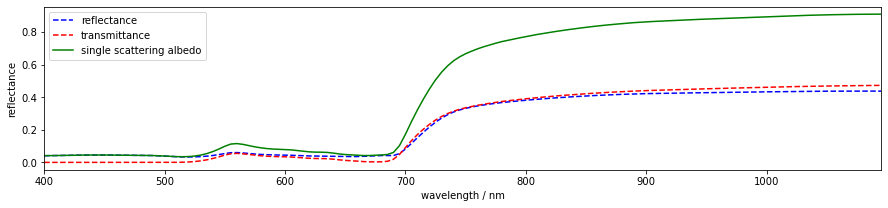

In [4]:
l = leaf.Leaf(verbose=True)

print ('keys available:',l.data.keys())

s = {'lambda':np.arange(400,1100,5)}
l.add_spectra(s)

# set up parameters
conc = {'Cab':50, 'Car':50, 'N':1.5, 'Cw':0.001, 'Brown':1.0, 'Cm':0.01}
l.rt(conc)
plotty(l.data['lambda'],l.r,l.t)

## 1.2 Adding a new spectrum

To add a new spectrum, set up a dictionary, e.g. `s`:

`s = {'k_Cchar':char}`

where `char` is an array specifying the absorptance coefficients as a function of wavelength. Wavelength is either implicit (i.e. `l.data['lambda']` so `char` is one column of data) or you can give two columns with the first being sample wavelength. In this latter case, it is interpolated to `l.data['lambda']`.

Then, run:

`l.add_spectra(s)`

Note that you can add as many new spectra as you like in the dictionary.

To remove items:

`del l.data['k_Cxx']`

We use it here for something we might use to help model burned leaves (a char spectrum).

/Users/plewis/anaconda3/lib/python3.8/site-packages/leaf/
considering lambda
considering k_Cchar
trying Cchar for k_Cchar
keys available: dict_keys(['lambda', 'refractive', 'k_Cab', 'k_Car', 'k_Brown', 'k_Cw', 'Es', 'Ed', 'Rsoil1', 'Rsoil2', 'k_Cchar'])
found k_Cchar from Cchar at 0.9
number of samples 400


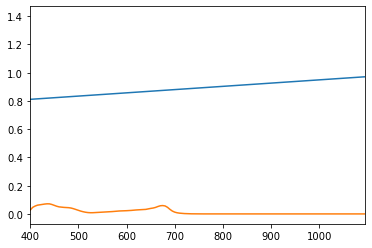

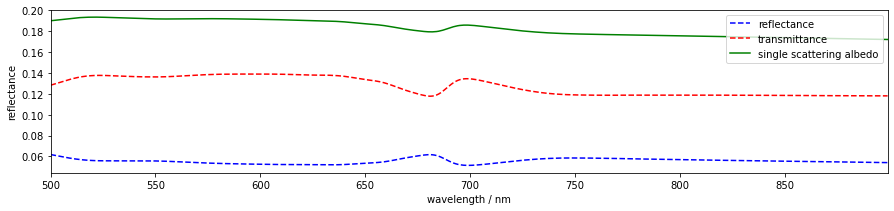

In [5]:
char = '''350 0.04 1220 0.05 1790 0.06 2300 0.07 2500 0.06'''
char = np.array(char.split())
char = char.reshape((int(len(char)/2),2)).astype(float).T
char[1] *= 20

plt.plot(char[0],char[1])
plt.plot(l.data['lambda'],l.data['k_Cab'])
plt.xlim(l.data['lambda'][0],l.data['lambda'][-1])
l = leaf.Leaf(verbose=True)

# we also change the wavelength rangs and sampling
s = {'lambda':np.arange(500,900,1),\
     'k_Cchar':char}
l.add_spectra(s)
# delete one just to see
del l.data['k_Cm']
print ('keys available:',l.data.keys())

# set up parameters
conc = {'Cchar':0.9}
l.rt(conc)
plotty(l.data['lambda'],l.r,l.t)